Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Use the same variable names as the ones written in the questions; otherwise, the tests will fail.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [ ]:
name = "Jiawei Li"

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{cases}
\frac{dh}{dt} = v\\
(m_s+m_p) \frac{dv}{dt} = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{cases}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 350 \frac{m}{s}$ is the exhaust speed

$C_D = 0.21 $ is the drag coefficient

$m_{po} = 150 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./figures/burn_rate.png)

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 4 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using RK2 (midpoint) technique with a time-step size of $\Delta t=0.05s$, implement a code (in this notebook) to calculate the altitude and velocity of the rocket from launch until crash down.

_Hint:_ To compute the mass of the remaining propellant at a given time $t$, you can use the function `integrate.quad()` from the SciPy package.
(Check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to understand how to use it.)

---

## Implement your solution (40 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [240]:
# Import your libraries.
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import integrate

In [241]:
# YOUR CODE HERE
#Assign value to varibles
Ms=50.0
g=9.81
density=1.091
A=numpy.pi*0.5**2
Ve=350.0
Cd=0.21
Mp0=150.0


In [242]:
#Initial Condition
v0=0.0
h0=0.0


In [243]:
#Define time
T=30.0
dt=0.05
N=int(T/dt)+1


In [244]:
# Create array to store the solution at each time step.
u = numpy.zeros((N, 2))



In [245]:
# assign v0 to the correct index in u
u[0,0]=v0

# assign theta0 to the correct index in u
u[0,1]=h0

u_star=u

In [246]:
#Define mp_dot
def Mp_dot(t):
    if t<4:
        return 20
    else:
        return 0


In [247]:
# iteration through RK method
# the loop should loop through n=0, 1, 2, ..., N-2
for n in range(0,N-1):

#extract v at the n-th time point from the array u
    h_n = u[n,0]

#extract theta at the n-th time point from the array u
    v_n = u[n,1]


#f(u^n) in the right-hand-side
    f_n = numpy.array([
          v_n,
          -g+Mp_dot(0.05*n)*Ve/(Ms+Mp0-integrate.quad(Mp_dot,0,0.05*n)[0]) 
          - 0.5*density*v_n*numpy.abs(v_n)*A*Cd/(Ms+Mp0-integrate.quad(Mp_dot,0,0.05*n)[0])
                    ])

# update values  by RK2 method: u_star = u + 0.5 * dt * f
    u_star = u[n] + 0.5*dt * f_n

    f_n_star = numpy.array([
          u_star[1],
          -g+Mp_dot(0.05*n)*Ve/(Ms+Mp0-integrate.quad(Mp_dot,0,0.05*n)[0]) 
          - 0.5*density*u_star[1]*numpy.abs(u_star[1])*A*Cd/(Ms+Mp0-integrate.quad(Mp_dot,0,0.05*n)[0])
                           ])

#u_new = u + dt * f(u_star, *args)  
    u[n+1] = u[n] + dt * f_n_star
    
    
    #if u[n,1] <= u[n-1,1] and u[n-1,1] >= u[n-2,1]:
    #if u[n,0] <= u[n-1,0] and u[n-1,0] >= u[n-2,0]:  

    #if u[n,0] <= 0 and u[n-1,0] >= 0:
        #print(n)
        #print(n*dt-dt)
        #print(u[n-1,1])
   
    if u[n+1,0]<0:
        break


    
    


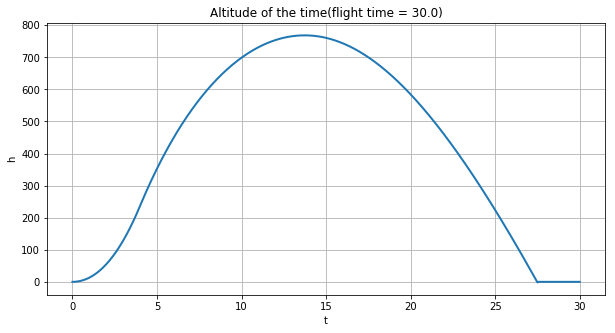

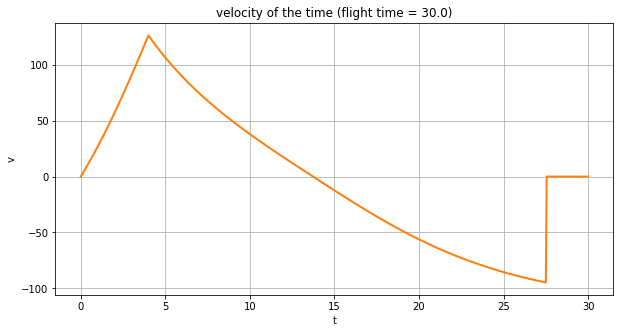

In [248]:
%matplotlib inline
# Plot the path of the glider.
x = u[:, 0]
y = u[:, 1]
t=numpy.linspace(0.0,T,num=N)


pyplot.figure(1,figsize=(10.0, 5.0))
pyplot.title('Altitude of the time(flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('h')
pyplot.grid()
pyplot.plot(t,x,color='C0', linestyle='-', linewidth=2);

pyplot.figure(2,figsize=(10.0, 5.0))
pyplot.title('velocity of the time (flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('v')
pyplot.grid()
pyplot.plot(t,y,color='C1', linestyle='-', linewidth=2);


In [249]:
print(max(x))
print(max(y))



768.4214504778704
126.29648438137988


# ---

## Assessment (60 points)

Answer questions in this section.

Do not try to delete or modify empty code cells that are already present.
For each question, provide your answer in the cell **just above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)
Pay attention to the name of the variables we ask you to create to store computed values; if the name of the variable is misspelled, the test will fail.

In [250]:
# Import module to check answers.
import mooc

**Q1. (10 points)** Using Matplotlib, plot the history of the altitude and velocity of the rocket over time.

Don't forget to include axis labels and a legend, if necessary, to your Matplotlib figure.

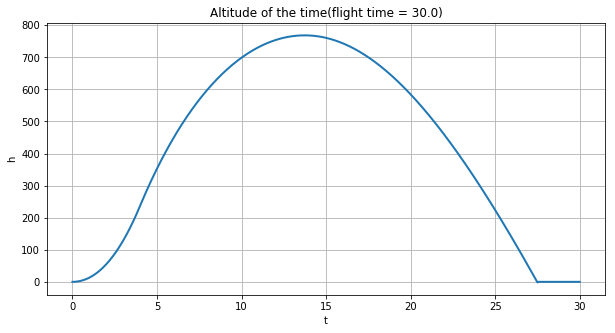

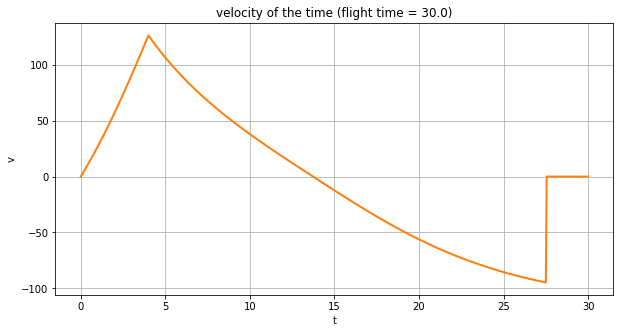

In [251]:
# YOUR CODE HERE
%matplotlib inline
# Plot the path of the glider.
x = u[:, 0]
y = u[:, 1]
t=numpy.linspace(0.0,T,num=N)

pyplot.figure(1,figsize=(10.0, 5.0))
pyplot.title('Altitude of the time(flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('h')
pyplot.grid()
pyplot.plot(t,x,color='C0', linestyle='-', linewidth=2);

pyplot.figure(2,figsize=(10.0, 5.0))
pyplot.title('velocity of the time (flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('v')
pyplot.grid()
pyplot.plot(t,y,color='C1', linestyle='-', linewidth=2);

**Q2. (5 points)** At time $t=15.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? 

_Instructions:_

* Store the value of the remaining propellant using a variable called `m_p`.
You can call the function `mooc.check('hw1_answer1', m_p)` to check you got the correct answer. The function will print `'Good job!'` if you got it right, `'Try again!'` otherwise.

In [252]:
# YOUR CODE HERE
m_p=70
mooc.check('hw1_answer1', m_p)


[hw1_answer1] Good job!


**Q3. (15 points)** What is the maximum speed of the rocket in $\frac{m}{s}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

_Instructions:_

* Store the maximum speed in the variable `vmax`, check your answer with `mooc.check('hw1_answer2', vmax)`.
* Store the time in `t_vmax`, check your answer with `mooc.check('hw1_answer3', t_vmax)`.
* Store the altitude in the variable `h_vmax`, check your answer with `mooc.check('hw1_answer4', h_vmax)`.

In [253]:
vmax=u[80,1]
t_vmax=(81-1)*dt
h_vmax=u[80,0]
mooc.check('hw1_answer2', vmax)
mooc.check('hw1_answer3', t_vmax)
mooc.check('hw1_answer4', h_vmax)

[hw1_answer2] Good job!
[hw1_answer3] Good job!
[hw1_answer4] Good job!


**Q4. (10 points)** What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

_Instructions:_

* Store the maximum altitude in the variable `hmax`, check your answer with `mooc.check('hw1_answer5', hmax)`.
* Store the time in the variable `t_hmax`, check your answer with `mooc.check('hw1_answer6', t_hmax)`.

In [254]:
hmax=u[275,0]
t_hmax=13.75
mooc.check('hw1_answer5', hmax)
mooc.check('hw1_answer6', t_hmax)


[hw1_answer5] Good job!
[hw1_answer6] Good job!


**Q5. (20 points)** At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

The time and velocity of the impact should be linearly interpolated at altitude $h = 0$.

_Instructions:_

* Store the time of impact in the variable `t_impact`, check your answer with `mooc.check('hw1_answer7', t_impact)`.
* Store the impact velocity in the variable `v_impact`, check your answer with `mooc.check('hw1_answer8', v_impact)`.

In [255]:

t_impact=0.5*((549)*dt+(550)*dt)
v_i=0.5*(u[550,1]+u[549,1])
print(v_i)
n=(u[550,0])
p=(u[549,0])
print(n)
print(p)
print(u[550,1])
print(u[549,1])
v_impact=u[549,1]*(1-(0-p)/(u[550,0]-u[549,0]))+u[550,1]*((0-p)/(u[550,0]-u[549,0]))
mooc.check('hw1_answer7', t_impact)
mooc.check('hw1_answer8', v_impact)
v_impact

-94.59186170702856
-1.8854072205296069
2.8441996552303834
-94.6693963726477
-94.51432704140942
[hw1_answer7] Good job!
[hw1_answer8] Good job!


-94.60757964147331

---

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}

